<a href="https://colab.research.google.com/github/Pablix17/Inteligencia-Artificial-2023/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias


In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Para el desarrollo de las regresiones lo que se muestra a continuación es en primer instante la extracción de datos desde los .CSV y el cálculo de la regresión lineal. posteriormente haciendo uso la librería Seaborn para mostrar la gráfica correspondiente a la regresión.

para los casos de orden 2 y 3 lo que se realiza es el cálculo de la regresión polinómica haciendo uso de sklearn, en cuanto a las gráficas mostradas, se presentan 2 una dada por los cálculos proporcionados por la función y la otra la muestra la librería Seaborn. las gráficas se alcanzan a notar que son similares, diferenciándose únicamente en detalles estéticos siendo las curvas de SNS más suaves.


# Caso 1
Para este caso se usa un archivo que contiene los datos de cargo y salario, los cargos están ordenados de menor a mayor, dado ese orden se puede plantear la regresión.

In [ ]:
data = pd.read_csv('Position_Salaries.csv',sep=",")
x= data.iloc[:, 1:2].values
y= data.iloc[:, 2].values
modelo=LinearRegression()
modelo.fit(x,y)
y_pred=modelo.predict(x)
r_squared=r2_score(y,y_pred)
print("coeficiente de determinación:",r_squared)

coeficiente de determinación: 0.6690412331929895


Regresión lineal

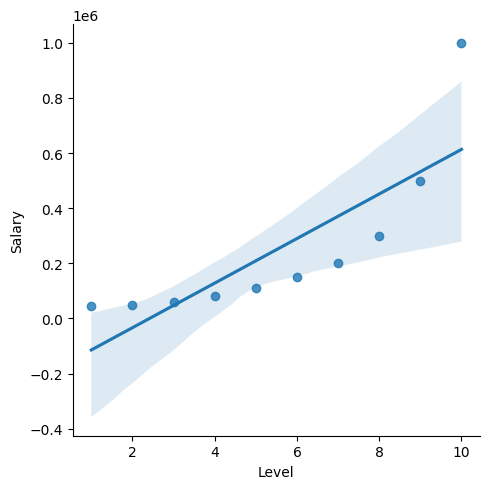

In [ ]:
sns.lmplot(x="Level", y="Salary", data=data)

Segundo Grado

In [ ]:
poli=PolynomialFeatures(degree=2)
Xpoli=poli.fit_transform(x)
reg = LinearRegression(fit_intercept=False)
reg.fit(Xpoli, y)
y_pred2=reg.predict(Xpoli)
r_squared=r2_score(y,y_pred2)
print("coeficiente de determinación:",r_squared)


coeficiente de determinación: 0.9162082221443942


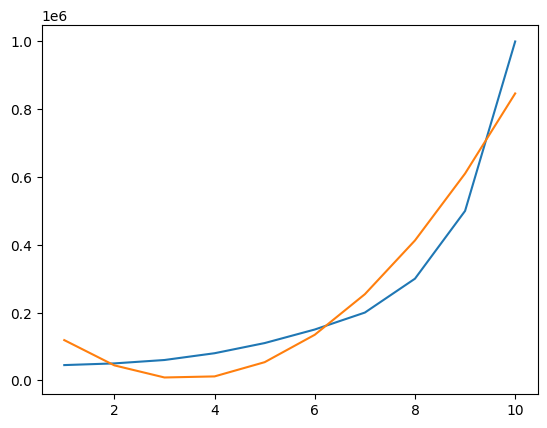

In [ ]:
plt.figure
plt.plot(x,y,)
plt.plot(x,reg.predict(poli.fit_transform(x)))


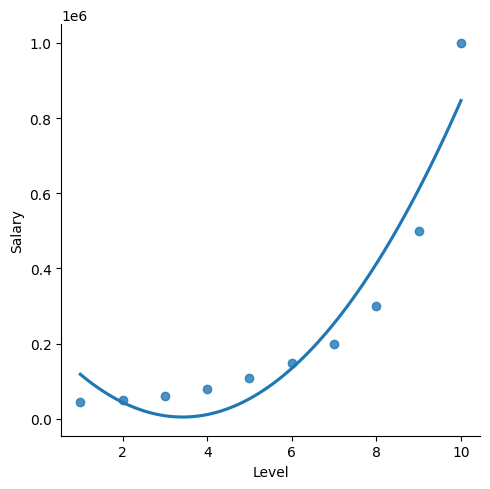

In [ ]:
sns.lmplot(x='Level', y='Salary', data=data, order=2, ci=None)

Tercer Grado

In [ ]:
poli3=PolynomialFeatures(degree=3)
Xpoli3=poli3.fit_transform(x.reshape(-1, 1))
reg3 = LinearRegression(fit_intercept=False)
reg3.fit(Xpoli3, y)
y_pred3=reg3.predict(Xpoli3)
r_squared=r2_score(y,y_pred3)
print("coeficiente de determinación:",r_squared)

coeficiente de determinación: 0.9812097727913367


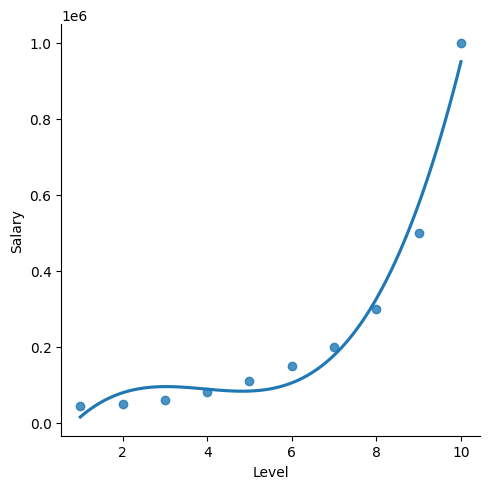

In [ ]:
sns.lmplot(x='Level', y='Salary', data=data, order=3, ci=None)

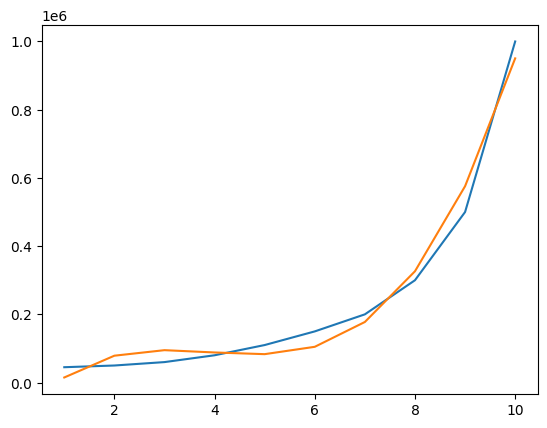

In [ ]:
plt.figure
plt.plot(x,y,)
plt.plot(x,reg3.predict(poli3.fit_transform(x)))

Conclusiones

Para este caso, se evidencia que los datos no son precisamente lineales, tienen una tendencia a una curva creciente, por ello, la regresión lineal da una determinación no muy eficiente al ser solo de 0.669, a medida que se aumenta el orden, la curva se aproxima más a los datos, siendo la de orden 2 de valor 0.916 y la de orden 3, ya un modelo muy aproximado a los datos, generando un coeficiente de determinación de 0.981.



# Caso 2

Este dataset contiene un listado de datos de venados en donde se relacionan la edad del venado y la medida de los huesos de la mandíbula del venado. Para esta situación no es tan fácil notar una tendencia, solo se nota que entre más viejo el venado, más grande sus huesos.

In [ ]:
data = pd.read_csv('jaws.csv',sep=",")
x= data.iloc[:, 0:1].values
y= data.iloc[:, -1].values
modelo=LinearRegression()
modelo.fit(x,y)
y_pred=modelo.predict(x)
r_squared=r2_score(y,y_pred)
print("coeficiente de determinación:",r_squared)


coeficiente de determinación: 0.5618531313596117


Regresión lineal

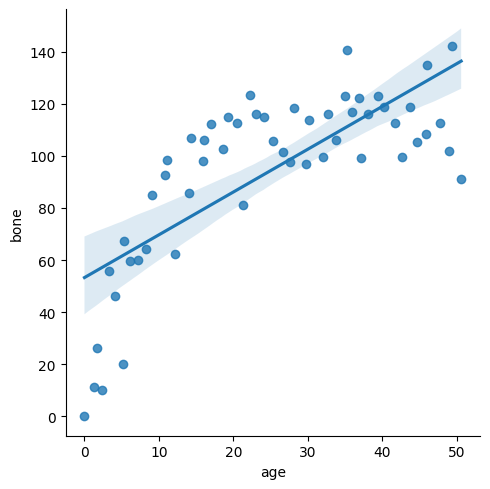

In [ ]:
sns.lmplot(x="age", y="bone", data=data)

Segundo Grado

In [ ]:
poli=PolynomialFeatures(degree=2)
Xpoli=poli.fit_transform(x)
reg = LinearRegression(fit_intercept=False)
reg.fit(Xpoli, y)
y_pred2=reg.predict(Xpoli)
r_squared=r2_score(y,y_pred2)
print("coeficiente de determinación:",r_squared)

coeficiente de determinación: 0.8016336890545417


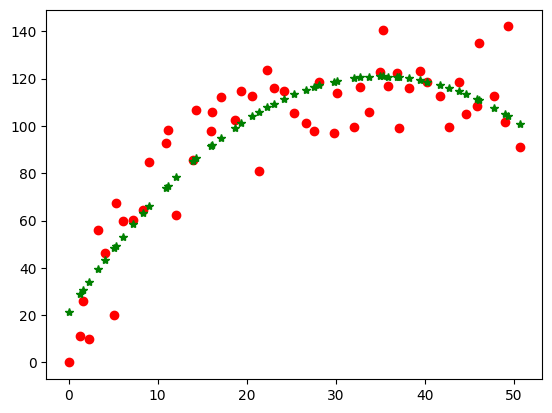

In [ ]:
plt.figure
plt.plot(x,y,"ro")
plt.plot(x,reg.predict(poli.fit_transform(x)),"g*")

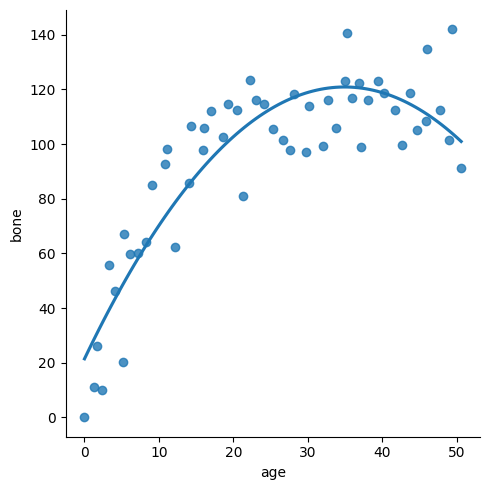

In [ ]:
sns.lmplot(x='age', y='bone', data=data, order=2, ci=None)

Tercer Grado

In [ ]:
poli3=PolynomialFeatures(degree=3)
Xpoli3=poli3.fit_transform(x.reshape(-1, 1))
reg3 = LinearRegression(fit_intercept=False)
reg3.fit(Xpoli3, y)
y_pred3=reg3.predict(Xpoli3)
r_squared=r2_score(y,y_pred3)
print("coeficiente de determinación:",r_squared)


coeficiente de determinación: 0.8421451196779601


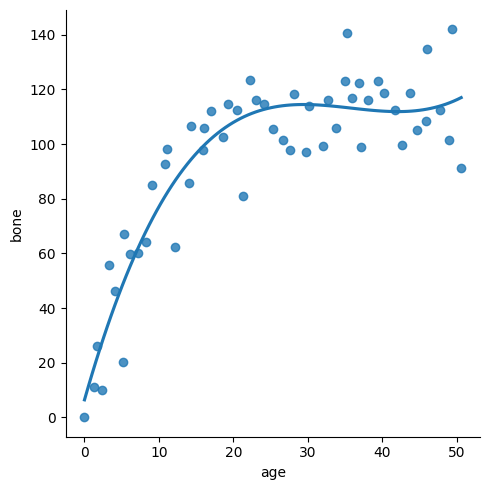

In [ ]:
sns.lmplot(x='age', y='bone', data=data, order=3, ci=None)

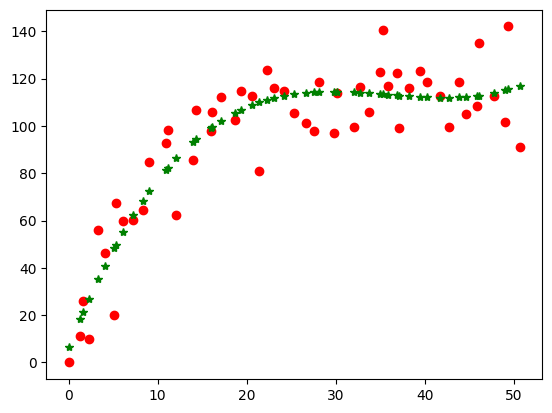

In [ ]:
plt.figure
plt.plot(x,y,"ro")
plt.plot(x,reg3.predict(poli3.fit_transform(x)),"g*")

Conclusiones

Este caso a diferencia del anterior, tiene los datos mas dispersos, no muestran una clara tendencia hacia una forma conocida de organización de datos, pero mediante la regresión, se puede aproximar a un orden, en la regresión lineal se nota que no es un modelo muy claro, solo llega a 0.562 (no muy buen caso), al empezar a aumentar el orden se evidencia una mejora, llegando en orden dos a 0.802 y en el orden 3 se llega a 0.842 que es un numero adecuadamente cercano a 1, por lo tanto logra explicar de forma aceptable el modelo distributivo que relaciona la edad del venado y su mandíbula.

# Caso 3

Este archivo cuenta con un banco de 1000 películas, con datos de interés como el nombre, director, descripción, año de salida, puntuaciones, genero, elenco y recaudación. para este estudio se toma en comparación el año de salida y su puntuación en la página IMDB.  

In [ ]:
data = pd.read_csv('IMDB_movies.csv',sep=",")
x= data.iloc[:, 6:7].values
y= data.iloc[:, 8].values
modelo=LinearRegression()
modelo.fit(x,y)
y_pred=modelo.predict(x)
r_squared=r2_score(y,y_pred)
print("coeficiente de determinación:",r_squared)


coeficiente de determinación: 0.04461336314113418


Regresión lineal

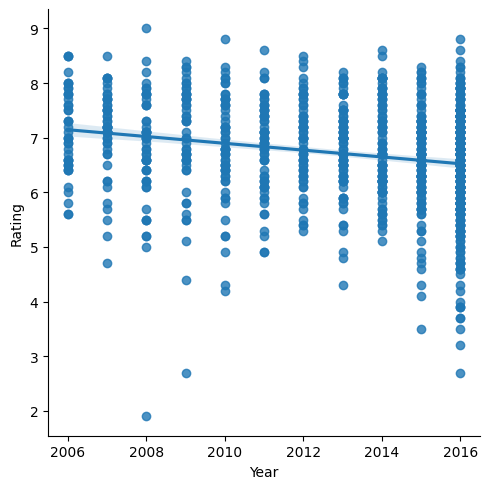

In [ ]:
sns.lmplot(x="Year", y="Rating", data=data)

Segundo Grado

In [ ]:
poli=PolynomialFeatures(degree=2)
Xpoli=poli.fit_transform(x)
reg = LinearRegression(fit_intercept=False)
reg.fit(Xpoli, y)
y_pred2=reg.predict(Xpoli)
r_squared=r2_score(y,y_pred2)
print("coeficiente de determinación:",r_squared)

coeficiente de determinación: 0.048156742382919115


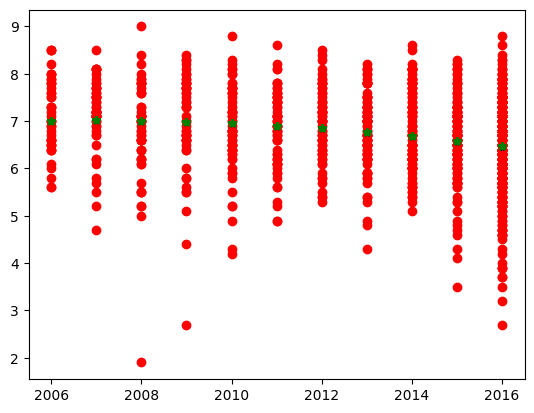

In [ ]:
plt.figure
plt.plot(x,y,"ro")
plt.plot(x,reg.predict(poli.fit_transform(x)),"g*")

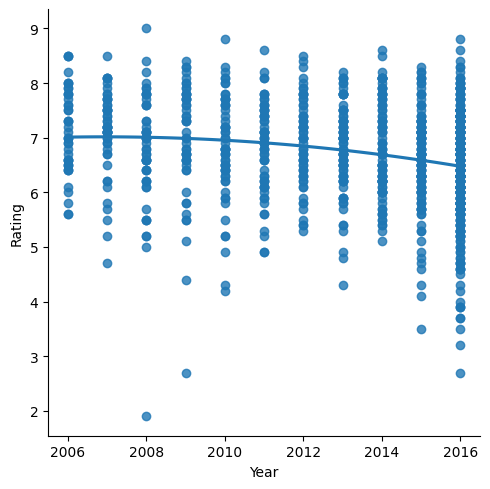

In [ ]:
sns.lmplot(x="Year", y="Rating", data=data, order=2, ci=None)

Tercer Grado

In [ ]:
poli3=PolynomialFeatures(degree=3)
Xpoli3=poli3.fit_transform(x.reshape(-1, 1))
reg3 = LinearRegression(fit_intercept=False)
reg3.fit(Xpoli3, y)
y_pred3=reg3.predict(Xpoli3)
r_squared=r2_score(y,y_pred3)
print("coeficiente de determinación:",r_squared)


coeficiente de determinación: 0.048168418591226


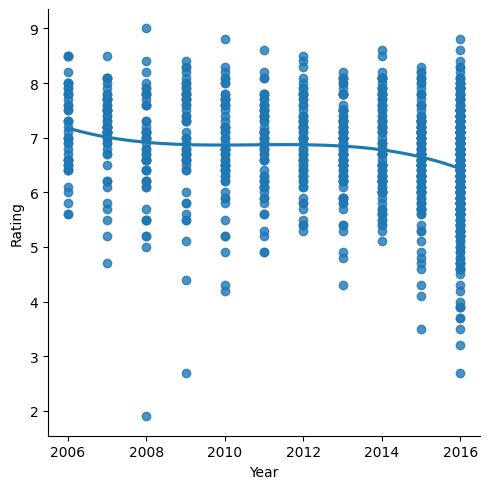

In [ ]:
sns.lmplot(x="Year", y="Rating", data=data, order=3, ci=None)

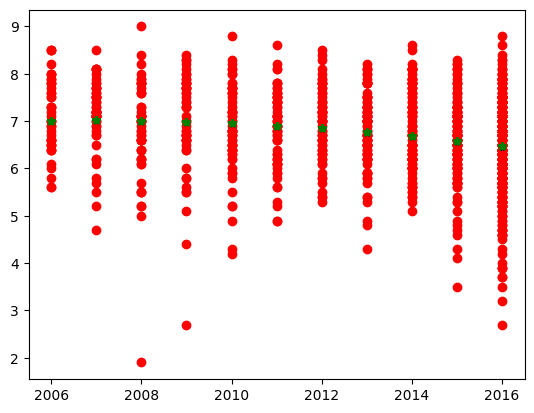

In [ ]:
plt.figure
plt.plot(x,y,"ro")
plt.plot(x,reg3.predict(poli3.fit_transform(x)),"g*")

Conclusión

En este caso se tiene un coeficiente de determinación pésimo para todos los órdenes, solo llega máximo a 0.048, un dato muy cercano a 0, dando de esta manera a entender que el modelo planteado de regresión no es el más apropiado para la distribución de los datos a estudiar.